In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report

In [2]:
df = pd.read_csv("C:/AI_study/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [4]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

## Features
- id: id
- Sex: 성별 M(수컷), F(암컷), I(유아기)
- Length: 길이(앞에서 뒤까지, mm)
- Diameter: 지름(길이에 수직인 방향, mm)
- Height: 높이(껍질 포함, mm)
- Whole_weight: 전체 무게(껍질 포함, g)
- Shucked_weight: 무게(껍질 제거, g)
- Viscera_weight: 전복 내장 무게(g)
- Shell_weight: 건조 후 껍질 무게(g)
- Rings: 나선(전복의 나이 추정, 나이 = Rings + 1.5) - label

- 현재 Features 중 id의 경우는 단순히 0 ~ 4176까지 나열한 것이므로 필요 없음
- Sex의 경우 object형으로 M, F, I를 값으로 가지기 때문에 EDA하고 모델에 넣기 위해 Label Encoding이 필요

In [5]:
# 필요 없는 Feature인 id 제거
df = df.drop('id', axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


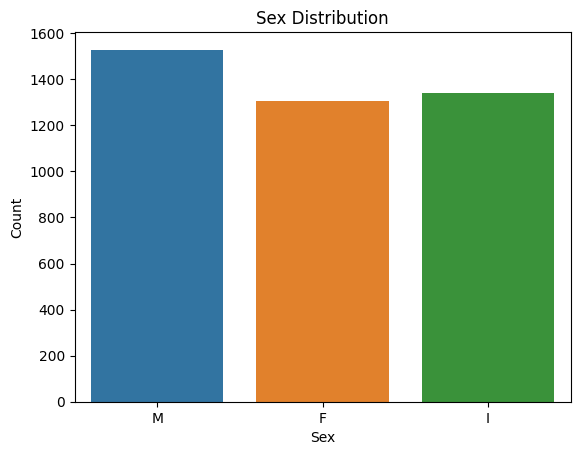

In [6]:
# Sex 분포 시각화
sns.countplot(data=df, x="Sex", hue="Sex", palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution")

plt.show()

In [7]:
# Sex 피처에 Label Encoding 적용

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

df['Sex_encoded'] = le.fit_transform(df['Sex'])

df = df.drop('Sex', axis=1)
df.insert(0, 'Sex_encoded', df.pop('Sex_encoded'))

# 결과 확인
print(df)

      Sex_encoded  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0               2   0.455     0.365   0.095        0.5140          0.2245   
1               2   0.350     0.265   0.090        0.2255          0.0995   
2               0   0.530     0.420   0.135        0.6770          0.2565   
3               2   0.440     0.365   0.125        0.5160          0.2155   
4               1   0.330     0.255   0.080        0.2050          0.0895   
...           ...     ...       ...     ...           ...             ...   
4172            0   0.565     0.450   0.165        0.8870          0.3700   
4173            2   0.590     0.440   0.135        0.9660          0.4390   
4174            2   0.600     0.475   0.205        1.1760          0.5255   
4175            0   0.625     0.485   0.150        1.0945          0.5310   
4176            2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1

In [8]:
df.describe()

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
# 데이터 결측치 확인
df.isnull().sum()

Sex_encoded       0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

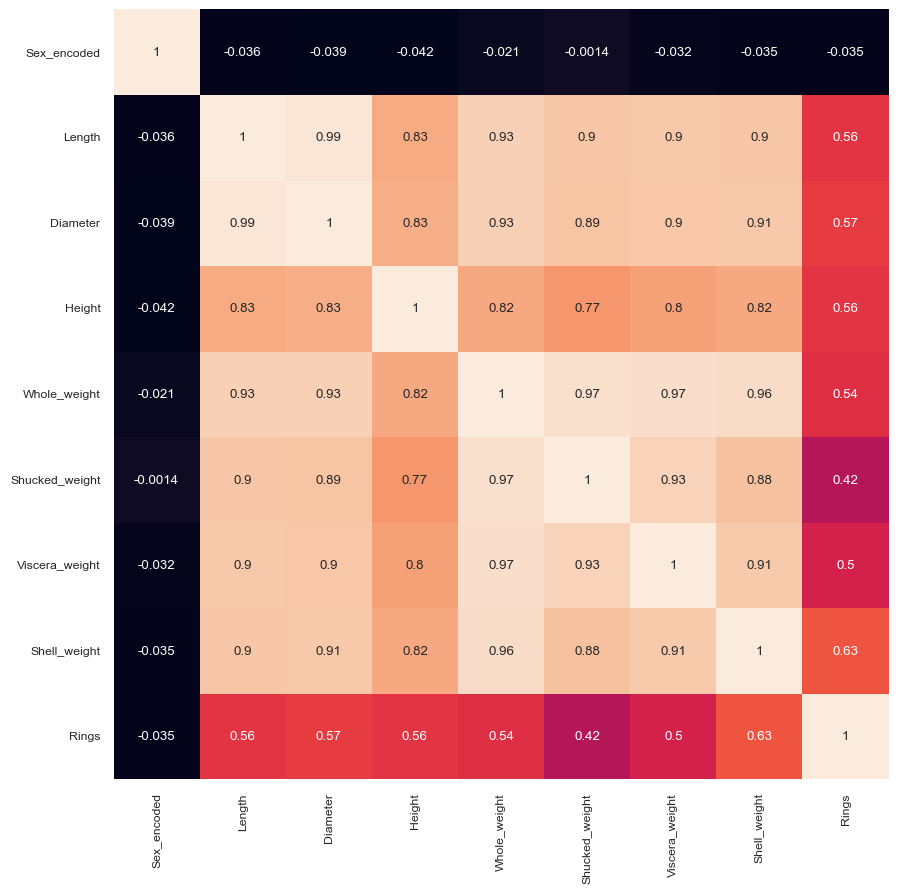

In [11]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## Target인 Rings와 가장 높은 상관 관계를 맺는 feature
- Shell_weight(0.63)

## Target인 Rings와 비교적 낮은 상관 관계를 맺는 features
- Sex_encoded(-0.035)
- Shucked_weight(0.42)
- Visvera_weight(0.5)

- Sex_encoded의 경우 매우 낮은 상관 관계를 갖고 있기 때문에 추후에 삭제 가능 

array([[<Axes: title={'center': 'Sex_encoded'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>],
       [<Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

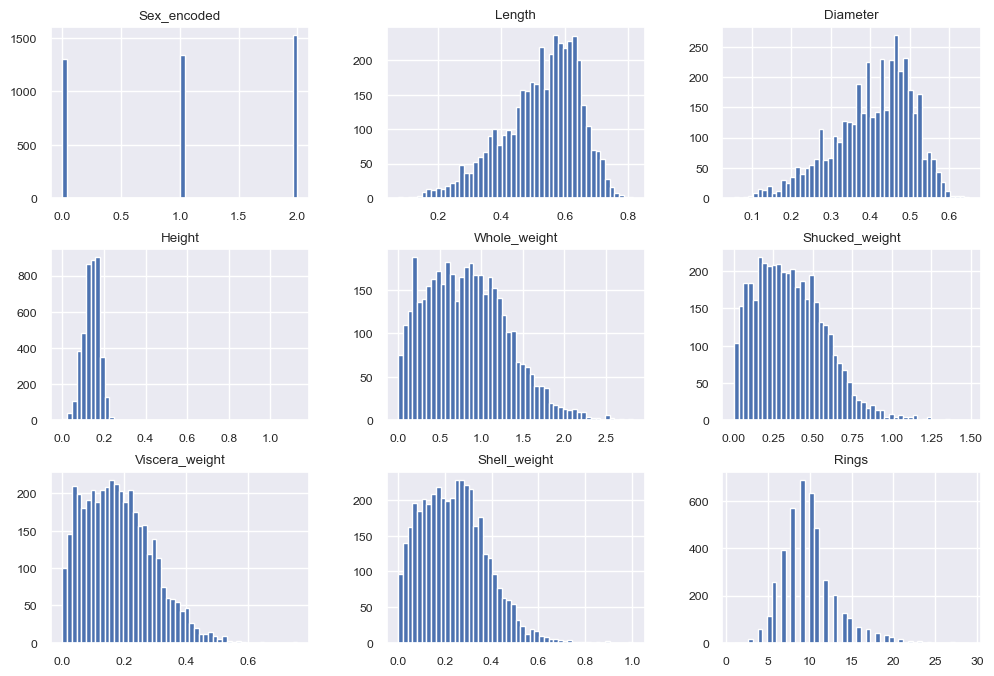

In [12]:
df.hist(bins=50, figsize=(12, 8))

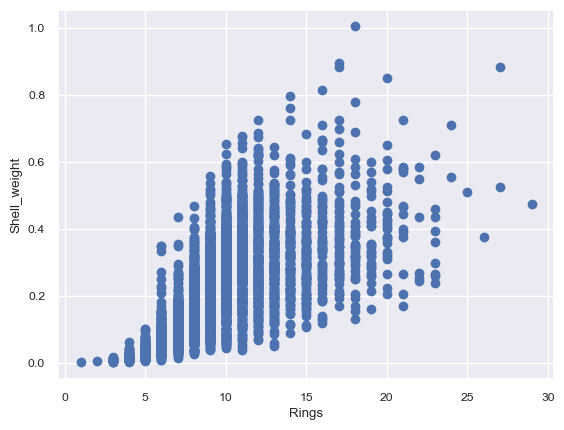

In [13]:
# Rings와 Shell_weight 관계
plt.scatter(df['Rings'], df['Shell_weight'])
plt.xlabel('Rings')
plt.ylabel('Shell_weight')

plt.show()

In [14]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Sex_encoded       1307
Length               0
Diameter             0
Height               2
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64


#### Height(높이)가 0 값이 나오는 것은 이상치로 판단

In [15]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Height'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  4177
제거 후 데이터 개수:  4175


2개의 데이터 제거

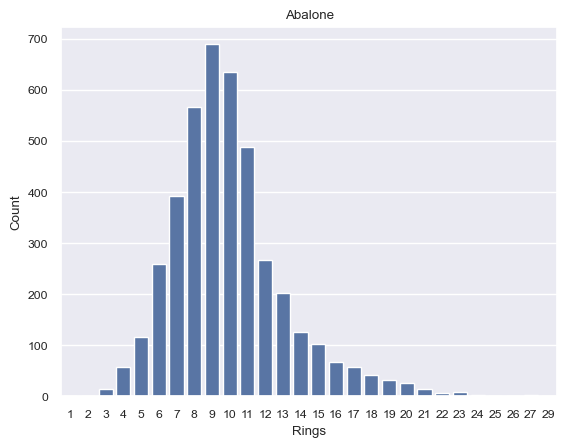

In [16]:
# Rings 시각화
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")

plt.show()

### Rings는 연속적인 수치 데이터를 가지므로 Classification 문제로 다루기 위해선 범주형 값으로 변환하는 과정이 필요

In [17]:
# 분위수 기반으로 구간 나누기
Rings_binned, bins = pd.qcut(df['Rings'], q=3, labels=['Young', 'Middle-aged', 'Old'], retbins=True)

# 구간 경계값 출력
print("구간 경계값: ", bins)

# 새로운 범주형 피처 생성
df['Rings_binned'] = Rings_binned

# 결과 확인
print(df[['Rings', 'Rings_binned']].head())

구간 경계값:  [ 1.  8. 11. 29.]
   Rings Rings_binned
0     15          Old
1      7        Young
2      9  Middle-aged
3     10  Middle-aged
4      7        Young


### pd.qcut 함수를 통해 각 구간에 비슷한 개수의 샘플이 있도록 분위수를 기준으로 구간을 나눔
- 구간 경계 값을 출력한 결과 (1 ~ 7, 8 ~ 10, 11 ~ 29)의 세 구간('Young', 'Middle-aged', 'Old')으로 나눠진 것을 확인할 수 있음

In [18]:
df['Rings_binned'].value_counts()

Rings_binned
Middle-aged    1810
Young          1405
Old             960
Name: count, dtype: int64

### 분위 수를 기반으로 나눴지만 Middle-aged와 Old 간의 차이가 두 배정도 나는 것을 확인할 수 있음
- 추후 OverSampling, UnderSampling 등을 적용할 수 있음

In [19]:
# 분류 문제로 적용하기 위해서 Rings 제거
X = df.drop('Rings', axis=1)
X

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_binned
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,Old
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,Young
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,Middle-aged
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,Middle-aged
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,Young
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,Middle-aged
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,Middle-aged
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,Middle-aged
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,Middle-aged


In [20]:
y = X['Rings_binned']
y

0               Old
1             Young
2       Middle-aged
3       Middle-aged
4             Young
           ...     
4172    Middle-aged
4173    Middle-aged
4174    Middle-aged
4175    Middle-aged
4176            Old
Name: Rings_binned, Length: 4175, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Old']

In [21]:
X = X.drop('Rings_binned', axis=1)
X

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3340, 8), (835, 8), (3340,), (835,))

In [23]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVC

# SVM 모델 학습
clf_svm = SVC(random_state=32)
clf_svm.fit(train_scaled, y_train)

# K-Fold 교차 검증 (K=5)
scores = cross_val_score(clf_svm, train_scaled, y_train, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.69161677 0.67065868 0.66766467 0.68712575 0.70808383]
평균 성능: 0.6850299401197604


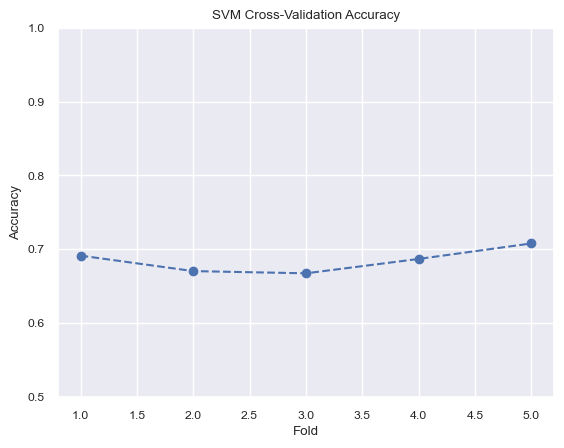

Mean accuracy across folds: 0.6850299401197604


In [25]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('SVM Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

# 평균 정확도 출력
print(f"Mean accuracy across folds: {scores.mean()}")

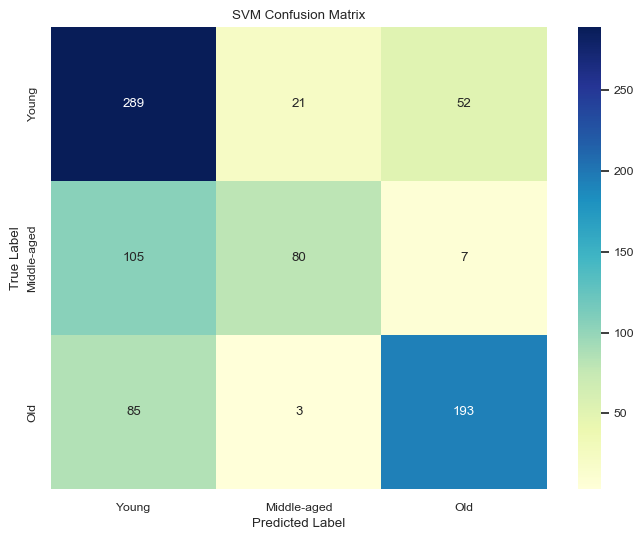


--- SVM Classifier ---
Test Accuracy: 0.6730538922155689
Macro F1 Score: 0.6506734061039331

Classification Report:
              precision    recall  f1-score   support

       Young       0.60      0.80      0.69       362
 Middle-aged       0.77      0.42      0.54       192
         Old       0.77      0.69      0.72       281

    accuracy                           0.67       835
   macro avg       0.71      0.63      0.65       835
weighted avg       0.70      0.67      0.67       835



In [26]:
# 혼동 행렬 계산 및 시각화
y_pred_svm = clf_svm.predict(test_scaled)
cm = confusion_matrix(y_test, y_pred_svm)

# 클래스 레이블 정의 (필요 시 클래스 레이블을 지정하세요)
LABELS = ['Young', 'Middle-aged', 'Old']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- SVM Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_svm)}")

# F1 스코어 계산 및 출력
f1 = f1_score(y_test, y_pred_svm, average='macro')  # 'macro'는 각 클래스에 대한 평균을 의미함
print(f"Macro F1 Score: {f1}")

# 각 클래스별 정밀도, 재현율, F1 스코어를 보고 싶다면 classification_report 사용
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=LABELS))

In [27]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=32)
clf_lr.fit(train_scaled, y_train)

# K-Fold 교차 검증 (K=5)
scores = cross_val_score(clf_lr, train_scaled, y_train, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.70209581 0.67215569 0.66167665 0.67964072 0.70359281]
평균 성능: 0.6838323353293413


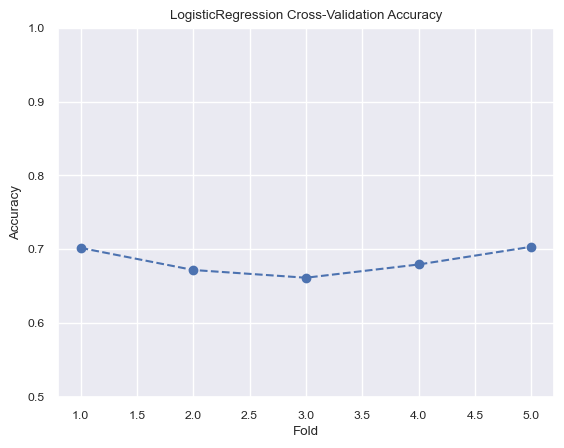

Mean accuracy across folds: 0.6838323353293413


In [28]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('LogisticRegression Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

# 평균 정확도 출력
print(f"Mean accuracy across folds: {scores.mean()}")

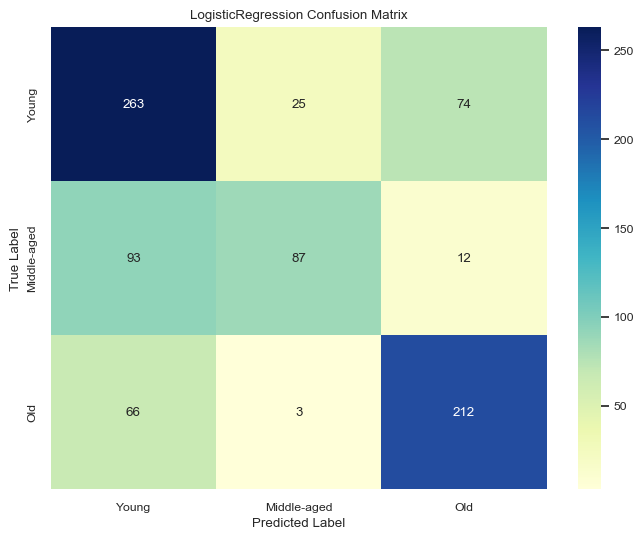


--- LogisticRegression Classifier ---
Test Accuracy: 0.6730538922155689
Macro F1 Score: 0.6566635585166315

Classification Report:
              precision    recall  f1-score   support

       Young       0.62      0.73      0.67       362
 Middle-aged       0.76      0.45      0.57       192
         Old       0.71      0.75      0.73       281

    accuracy                           0.67       835
   macro avg       0.70      0.64      0.66       835
weighted avg       0.68      0.67      0.67       835



In [29]:
# 혼동 행렬 계산 및 시각화
y_pred_lr = clf_lr.predict(test_scaled)
cm = confusion_matrix(y_test, y_pred_lr)

# 클래스 레이블 정의
LABELS = ['Young', 'Middle-aged', 'Old']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('LogisticRegression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- LogisticRegression Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_lr)}")

# F1 스코어 계산 및 출력
f1 = f1_score(y_test, y_pred_lr, average='macro')  # 'macro'는 각 클래스에 대한 평균을 의미함
print(f"Macro F1 Score: {f1}")

# 각 클래스별 정밀도, 재현율, F1 스코어를 보고 싶다면 classification_report 사용
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=LABELS))

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree 모델 학습
clf_dt = DecisionTreeClassifier(random_state=32)
clf_dt.fit(train_scaled, y_train)

# K-Fold 교차 검증 (K=5)
scores = cross_val_score(clf_dt, train_scaled, y_train, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.62724551 0.56886228 0.58383234 0.60628743 0.5988024 ]
평균 성능: 0.5970059880239521


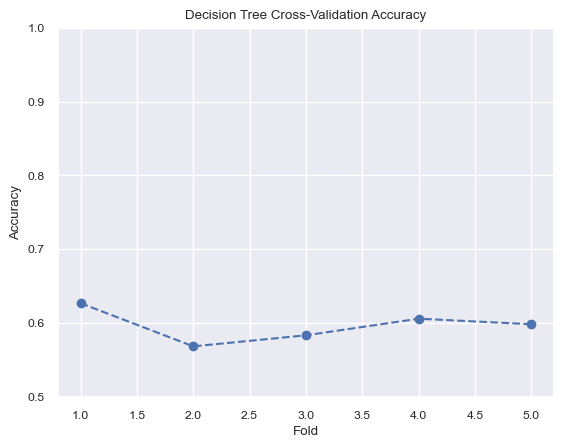

In [31]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('Decision Tree Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

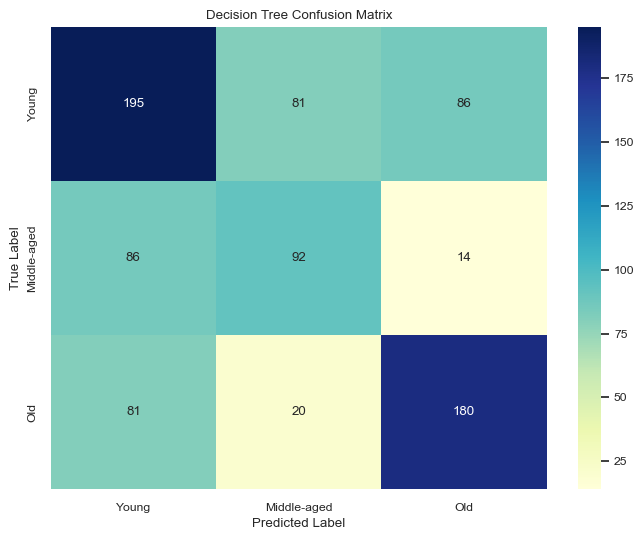


--- Decision Tree Classifier ---
Test Accuracy: 0.5592814371257485
Macro F1 Score: 0.5527691136725911

Classification Report:
              precision    recall  f1-score   support

       Young       0.54      0.54      0.54       362
 Middle-aged       0.48      0.48      0.48       192
         Old       0.64      0.64      0.64       281

    accuracy                           0.56       835
   macro avg       0.55      0.55      0.55       835
weighted avg       0.56      0.56      0.56       835



In [32]:
# 테스트 데이터에 대한 예측
y_pred_dt = clf_dt.predict(test_scaled)

# 혼돈 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred_dt)

# 클래스 레이블 정의 
LABELS = ['Young', 'Middle-aged', 'Old']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- Decision Tree Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt)}")

# F1 스코어 계산 및 출력
f1 = f1_score(y_test, y_pred_dt, average='macro')  # 'macro'는 각 클래스에 대한 평균을 의미함
print(f"Macro F1 Score: {f1}")

# 각 클래스별 정밀도, 재현율, F1 스코어를 보고 싶다면 classification_report 사용
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=LABELS))

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델 학습
clf_rf = RandomForestClassifier(random_state=32)
clf_rf.fit(train_scaled, y_train)

# K-Fold 교차 검증 (K=5)
scores = cross_val_score(clf_rf, train_scaled, y_train, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.68413174 0.68712575 0.66317365 0.66616766 0.68263473]
평균 성능: 0.6766467065868265


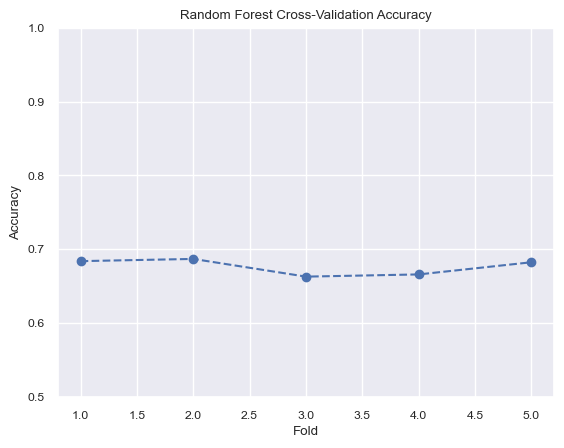

In [34]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('Random Forest Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

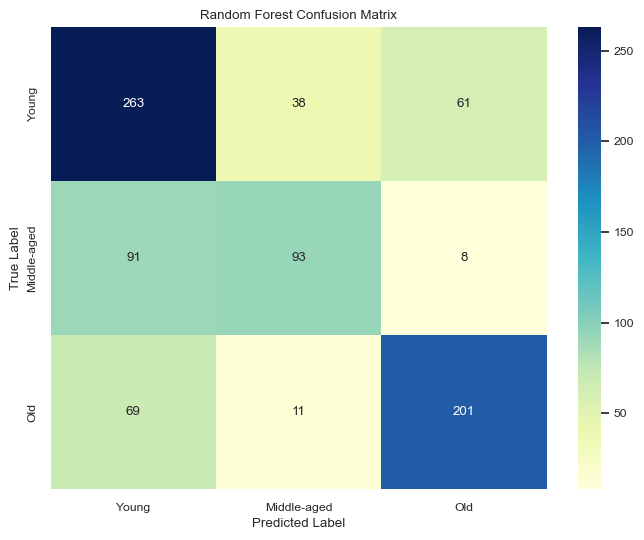


--- Random Forest Classifier ---
Test Accuracy: 0.667065868263473
Macro F1 Score: 0.6521774996483042

Classification Report:
              precision    recall  f1-score   support

       Young       0.62      0.73      0.67       362
 Middle-aged       0.65      0.48      0.56       192
         Old       0.74      0.72      0.73       281

    accuracy                           0.67       835
   macro avg       0.67      0.64      0.65       835
weighted avg       0.67      0.67      0.66       835



In [35]:
# 테스트 데이터에 대한 예측
y_pred_rf = clf_rf.predict(test_scaled)

# 혼돈 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred_rf)

# 클래스 레이블 정의
LABELS = ['Young', 'Middle-aged', 'Old']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- Random Forest Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# F1 스코어 계산 및 출력
f1 = f1_score(y_test, y_pred_rf, average='macro')  # 'macro'는 각 클래스에 대한 평균을 의미함
print(f"Macro F1 Score: {f1}")

# 각 클래스별 정밀도, 재현율, F1 스코어를 보고 싶다면 classification_report 사용
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=LABELS))

### 데이터 전처리 단계에서 정확도 올리기
- Rings와 상관관계가 비교적 낮았던 Sex_encoded, Shucked_weight 제거
- Smote 함수를 사용한 label OverSampling

In [36]:
# df에서 Sex_encoded, Shucked_weight 제거
df = df.drop(['Sex_encoded'], axis=1)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Rings_binned
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,Old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,Young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,Middle-aged
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,Middle-aged
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,Young
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,Middle-aged
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,Middle-aged
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,Middle-aged
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,Middle-aged


In [37]:
# 분류 문제로 적용하기 위해서 Rings 제거
X = df.drop('Rings', axis=1)
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_binned
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,Old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,Young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,Middle-aged
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,Middle-aged
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,Young
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,Middle-aged
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,Middle-aged
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,Middle-aged
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,Middle-aged


In [38]:
y = X['Rings_binned']
y

0               Old
1             Young
2       Middle-aged
3       Middle-aged
4             Young
           ...     
4172    Middle-aged
4173    Middle-aged
4174    Middle-aged
4175    Middle-aged
4176            Old
Name: Rings_binned, Length: 4175, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Old']

In [39]:
X = X.drop('Rings_binned', axis=1)
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3340, 7), (835, 7), (3340,), (835,))

In [41]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [42]:
# 결과 확인
print("원래 데이터셋 크기:", X_train.shape)
print("오버샘플링된 데이터셋 크기:", X_train_resampled.shape)

원래 데이터셋 크기: (3340, 7)
오버샘플링된 데이터셋 크기: (4353, 7)


In [43]:
# 클래스 분포 확인
print("오버샘플링 전 클래스 분포:\n", y_train.value_counts())
print("오버샘플링 후 클래스 분포:\n", y_train_resampled.value_counts())

오버샘플링 전 클래스 분포:
 Rings_binned
Middle-aged    1451
Young          1128
Old             761
Name: count, dtype: int64
오버샘플링 후 클래스 분포:
 Rings_binned
Young          1451
Middle-aged    1451
Old            1451
Name: count, dtype: int64


C:\Users\yc_hur\AppData\Local\Temp\ipykernel_7948\1542653737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["#1f77b4", "#ff7f0e", "#2ca02c"], legend=False)


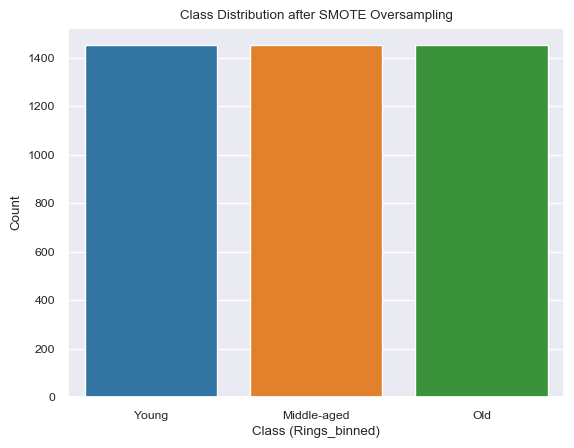

In [44]:
# 오버샘플링된 클래스 분포를 시리즈로 만듦
class_distribution = y_train_resampled.value_counts()

# 시각화
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["#1f77b4", "#ff7f0e", "#2ca02c"], legend=False)

# 그래프 설정
plt.xlabel('Class (Rings_binned)')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE Oversampling')

# 그래프 출력
plt.show()

In [45]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train_resampled)
train_scaled = ss.transform(X_train_resampled)
test_scaled = ss.transform(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVC

# SVM 모델 학습
clf_svm = SVC(random_state=32)
clf_svm.fit(train_scaled, y_train_resampled)

# K-Fold 교차 검증 (K=5)
scores = cross_val_score(clf_svm, train_scaled, y_train_resampled, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.67508611 0.67623421 0.68656716 0.68965517 0.69770115]
평균 성능: 0.685048761497552


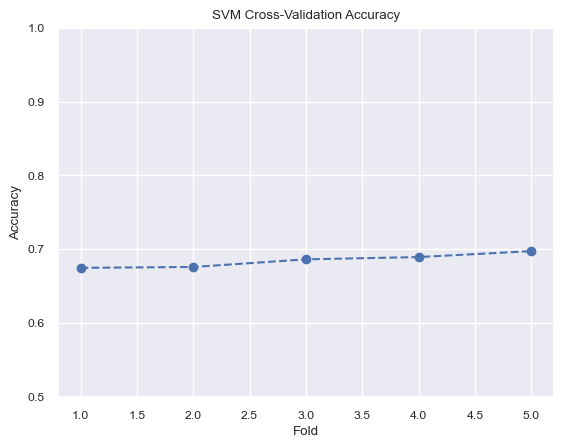

Mean accuracy across folds: 0.685048761497552


In [47]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('SVM Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

# 평균 정확도 출력
print(f"Mean accuracy across folds: {scores.mean()}")

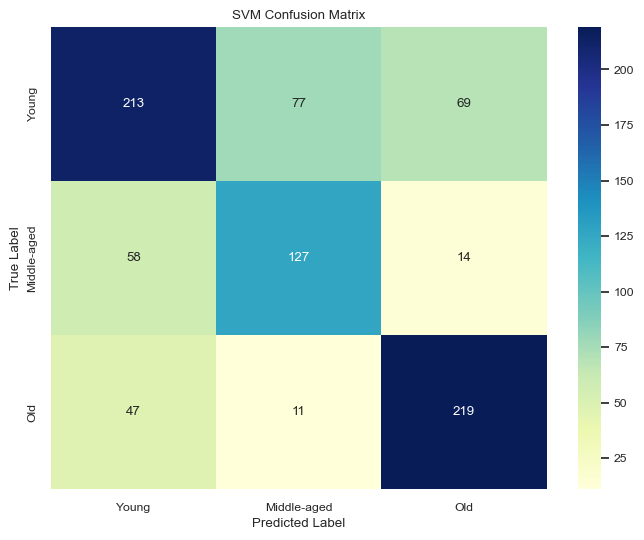


--- SVM Classifier ---
Test Accuracy: 0.6694610778443114
Macro F1 Score: 0.6664166435000553

Classification Report:
              precision    recall  f1-score   support

       Young       0.67      0.59      0.63       359
 Middle-aged       0.59      0.64      0.61       199
         Old       0.73      0.79      0.76       277

    accuracy                           0.67       835
   macro avg       0.66      0.67      0.67       835
weighted avg       0.67      0.67      0.67       835



In [48]:
# 혼동 행렬 계산 및 시각화
y_pred_svm = clf_svm.predict(test_scaled)
cm = confusion_matrix(y_test, y_pred_svm)

# 클래스 레이블 정의
LABELS = ['Young', 'Middle-aged', 'Old']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- SVM Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_svm)}")

# F1 스코어 계산 및 출력
f1 = f1_score(y_test, y_pred_svm, average='macro')  # 'macro'는 각 클래스에 대한 평균을 의미함
print(f"Macro F1 Score: {f1}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=LABELS))

In [49]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=32)
clf_lr.fit(train_scaled, y_train_resampled)

# K-Fold 교차 검증 (K=5)
scores = cross_val_score(clf_lr, train_scaled, y_train_resampled, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.68197474 0.67623421 0.71067738 0.69195402 0.69310345]
평균 성능: 0.6907887617614843


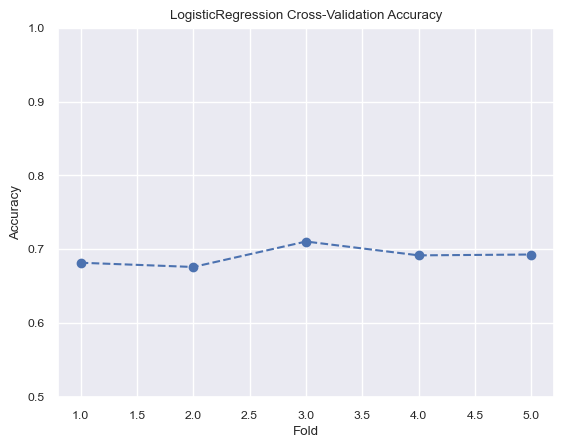

Mean accuracy across folds: 0.6907887617614843


In [50]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('LogisticRegression Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

# 평균 정확도 출력
print(f"Mean accuracy across folds: {scores.mean()}")

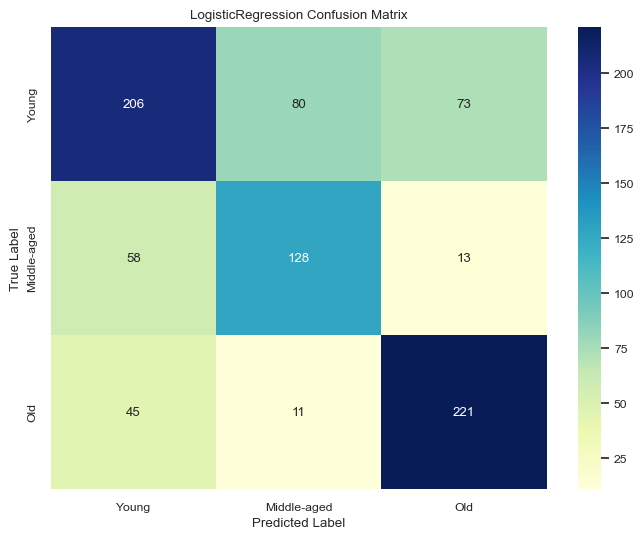


--- LogisticRegression Classifier ---
Test Accuracy: 0.6646706586826348
Macro F1 Score: 0.6620186578406404

Classification Report:
              precision    recall  f1-score   support

       Young       0.67      0.57      0.62       359
 Middle-aged       0.58      0.64      0.61       199
         Old       0.72      0.80      0.76       277

    accuracy                           0.66       835
   macro avg       0.66      0.67      0.66       835
weighted avg       0.66      0.66      0.66       835



In [51]:
# 혼동 행렬 계산 및 시각화
y_pred_lr = clf_lr.predict(test_scaled)
cm = confusion_matrix(y_test, y_pred_lr)

# 클래스 레이블 정의 (필요 시 클래스 레이블을 지정하세요)
LABELS = ['Young', 'Middle-aged', 'Old']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('LogisticRegression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- LogisticRegression Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_lr)}")

# F1 스코어 계산 및 출력
f1 = f1_score(y_test, y_pred_lr, average='macro')  # 'macro'는 각 클래스에 대한 평균을 의미함
print(f"Macro F1 Score: {f1}")

# 각 클래스별 정밀도, 재현율, F1 스코어를 보고 싶다면 classification_report 사용
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=LABELS))

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree 모델 학습
clf_dt = DecisionTreeClassifier(random_state=32)
clf_dt.fit(train_scaled, y_train_resampled)

# K-Fold 교차 검증 (K=5)
scores = cross_val_score(clf_dt, train_scaled, y_train_resampled, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.64982778 0.61997704 0.63605052 0.70229885 0.72528736]
평균 성능: 0.6666883091175422


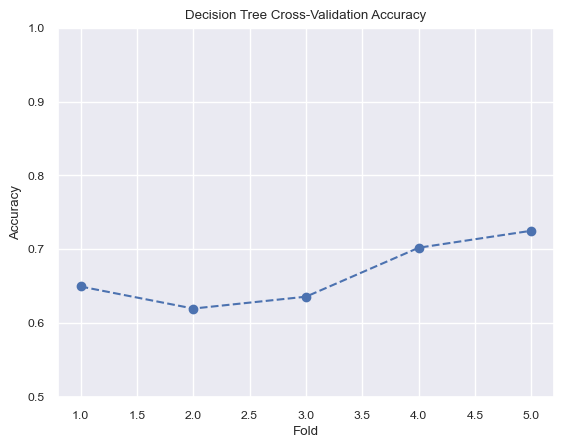

In [53]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('Decision Tree Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

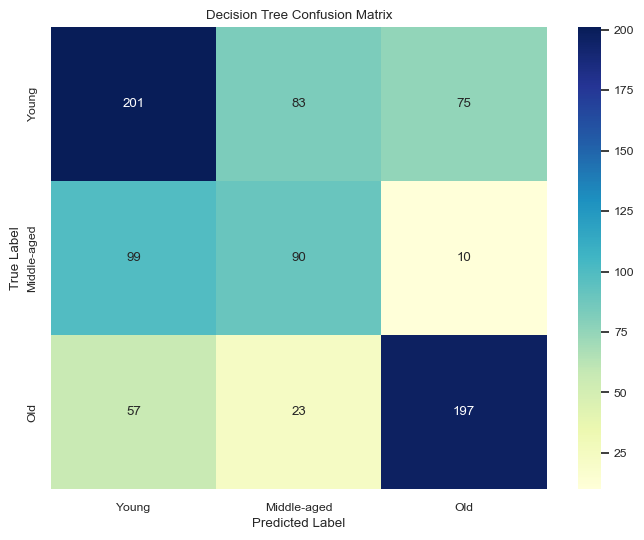


--- Decision Tree Classifier ---
Test Accuracy: 0.5844311377245509
Macro F1 Score: 0.573992923388463

Classification Report:
              precision    recall  f1-score   support

       Young       0.56      0.56      0.56       359
 Middle-aged       0.46      0.45      0.46       199
         Old       0.70      0.71      0.70       277

    accuracy                           0.58       835
   macro avg       0.57      0.57      0.57       835
weighted avg       0.58      0.58      0.58       835



In [54]:
# 테스트 데이터에 대한 예측
y_pred_dt = clf_dt.predict(test_scaled)

# 혼돈 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred_dt)

# 클래스 레이블 정의 
LABELS = ['Young', 'Middle-aged', 'Old']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- Decision Tree Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt)}")

# F1 스코어 계산 및 출력
f1 = f1_score(y_test, y_pred_dt, average='macro')  # 'macro'는 각 클래스에 대한 평균을 의미함
print(f"Macro F1 Score: {f1}")

# 각 클래스별 정밀도, 재현율, F1 스코어를 보고 싶다면 classification_report 사용
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=LABELS))

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델 학습
clf_rf = RandomForestClassifier(random_state=32)
clf_rf.fit(train_scaled, y_train_resampled)

# K-Fold 교차 검증 (K=5)
scores = cross_val_score(clf_rf, train_scaled, y_train_resampled, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.71986223 0.7152698  0.72904707 0.75862069 0.8183908 ]
평균 성능: 0.748238119746097


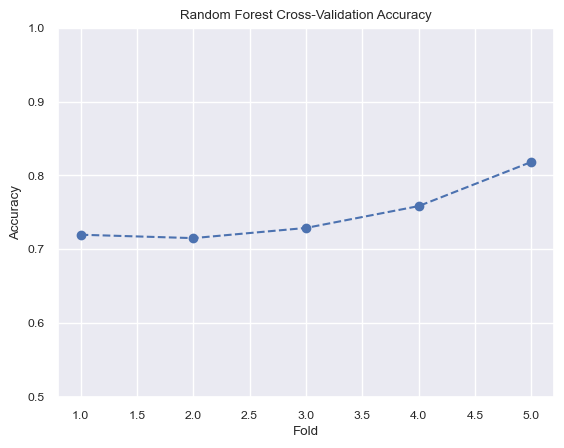

In [56]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('Random Forest Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

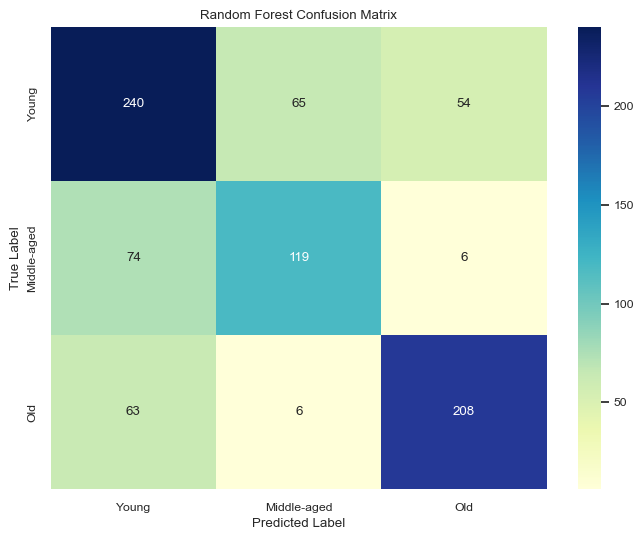


--- Random Forest Classifier ---
Test Accuracy: 0.6790419161676646
Macro F1 Score: 0.675767286046371

Classification Report:
              precision    recall  f1-score   support

       Young       0.64      0.67      0.65       359
 Middle-aged       0.63      0.60      0.61       199
         Old       0.78      0.75      0.76       277

    accuracy                           0.68       835
   macro avg       0.68      0.67      0.68       835
weighted avg       0.68      0.68      0.68       835



In [57]:
# 테스트 데이터에 대한 예측
y_pred_rf = clf_rf.predict(test_scaled)

# 혼돈 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred_rf)

# 클래스 레이블 정의
LABELS = ['Young', 'Middle-aged', 'Old']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- Random Forest Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# F1 스코어 계산 및 출력
f1 = f1_score(y_test, y_pred_rf, average='macro')  # 'macro'는 각 클래스에 대한 평균을 의미함
print(f"Macro F1 Score: {f1}")

# 각 클래스별 정밀도, 재현율, F1 스코어를 보고 싶다면 classification_report 사용
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=LABELS))

## 결과 F1 score(macro avg) 변화
- SVM: 0.65 > 0.64
- LogisticRegression: 0.66 > 0.66
- Decision Tree: 0.55 > 0.57
- Random Forest: 0.65 > 0.68
- 전체적으로 소폭 상승